# Jupyter notebook to evaluate the performance for classification tasks

In [1]:
import numpy as np 
import os 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
import numpy as np
from keras.utils import to_categorical
import pandas as pd
import matplotlib.pyplot as plt

Using TensorFlow backend.


Set your project directory here

In [2]:
path = "/Users/dominik.waibel/Documents/ICB/PipelinePublication/Code/ICBPipeline/examples/data/Classification/"

Importing the .csv files to compare results with groundtruth

In [3]:
Groundtruth_in = pd.read_csv(path + "test/groundtruth/groundtruth.csv")
Results_in = pd.read_csv(path + "results/results.csv")

In [12]:
Results = []
Groundtruth = []
Sigmoid_output = []
Sigmoid_max_output = []
for i in range(len(Results_in)): 
    loc = Groundtruth_in.loc[Groundtruth_in['filename'] == Results_in["filename"][i]]
    if str(loc['filename'].values)[2:-2] == Results_in["filename"][i]:
        Results.append(Results_in["prediciton"][i])
        Groundtruth.append((loc["groundtruth"]).values.astype(int))
        Sigmoid_output_i = Results_in["Probability for each possible outcome"][i]
        Sigmoid_max_output.append(max(Sigmoid_output_i))
        Sigmoid_output_i = np.array((Sigmoid_output_i)[1:-1].split())
        Sigmoid_output.append(Sigmoid_output_i)
Groundtruth = np.array(Groundtruth)
Results = np.array(Results)
Sigmoid_output = np.array(Sigmoid_output)
Sigmoid_max_output = np.array(Sigmoid_max_output)

In [13]:
def get_auc(y_test, y_score, n_classes):
    fpr = []# dict()
    tpr = [] #dict()
    roc_auc = [] #dict()
    for i in range(n_classes):
        fpr_out, tpr_out, _ = roc_curve(y_test[:, i].astype("float"), y_score[:, i].astype("float"))
        #print("fpr", fpr_out, "tpr", tpr_out)
        fpr.append(fpr_out)
        tpr.append(tpr_out)
        roc_auc.append(auc(fpr_out, tpr_out))
    plt.figure()
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label= "Class:" + str(i) +' ROC curve (area = %0.2f)' % roc_auc[i])
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    return roc_auc

Generating error metrics such as accuracy score and confusion matrix

In [16]:
Sigmoid_output = np.squeeze(Sigmoid_output)
accuracy = accuracy_score(Groundtruth, Results)
print("The accuracy score is:", accuracy)
n_classes = len(np.unique(Groundtruth))
GT = to_categorical(Groundtruth)
Res = to_categorical(Results)
print(n_classes)
print(np.shape(GT), np.shape(Sigmoid_output), n_classes)
roc_auc = get_auc(GT, Sigmoid_output, int(n_classes))
#Weighted Roc Auc: 
weigted_roc_auc = 0
for index, i in enumerate(np.unique(Groundtruth)): 
    print("Groundtruth.count(i)", i, np.count_nonzero(Groundtruth == i))
    weigted_roc_auc += np.count_nonzero(Groundtruth == i)*roc_auc[index]
weigted_roc_auc /= len(Groundtruth)
print("The weigted roc auc is:" ,weigted_roc_auc)

confusion_matr = confusion_matrix(Groundtruth, Results)
normalized_confustion_matrix = confusion_matr.astype('float') / confusion_matr.sum(axis=1)[:, np.newaxis]
print("The confusion matrix is: \n", confusion_matrix)
cmap=plt.cm.Blues
title = 'Confusion matrix'
os.makedirs((path + "/insights/"), exist_ok=True)

The accuracy score is: 0.4851258581235698
2
(437, 2) (437,) 2


IndexError: too many indices for array

NameError: name 'normalized_confustion_matrix' is not defined

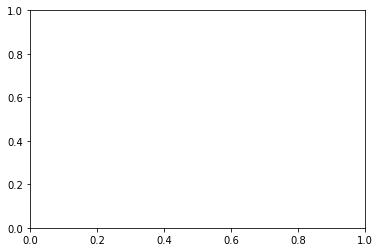

In [17]:
fig, ax = plt.subplots()
im = ax.imshow(normalized_confustion_matrix*100, interpolation='nearest', cmap='binary')
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(normalized_confustion_matrix.shape[1]), 
       yticks=np.arange(normalized_confustion_matrix.shape[0]),
       title="Normalized Confusion Matrix",
       ylabel='True label',
       xlabel='Predicted label')
plt.savefig(path + "/insights/Confusion Matrix.png")

Text(0.5, 0, 'Predicted Class')

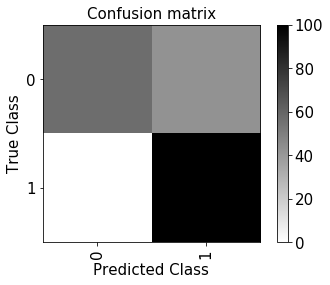

In [9]:
fig, ax = plt.subplots()
im = plt.imshow(normalized_confustion_matrix*100, interpolation='nearest', cmap='binary')
cbar = plt.colorbar(im)
cbar.ax.tick_params(labelsize=15) 
plt.xticks(np.arange(confusion_matr.shape[0]),fontsize=15, rotation = 90)
plt.yticks(np.arange(confusion_matr.shape[1]),fontsize=15)
plt.title(title, fontsize = 15)
plt.ylabel('True Class', fontsize = 15)
plt.xlabel('Predicted Class', fontsize = 15)

#plt.savefig(path + "/insights/Confusion Matrix.png")